In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WELL1.csv')
df.head()

,DEPTH,RHOB,DT,GR,FACIES
0,48.00,NaN,524.0485,NaN,1
1,48.15,NaN,524.0410,NaN,1
2,48.30,NaN,524.0336,NaN,1
3,48.45,NaN,524.0262,NaN,1
4,48.60,NaN,524.0190,NaN,1


In [3]:
df = df.dropna(how='any')
df.head()

,DEPTH,RHOB,DT,GR,FACIES
1427,262.05,1998.9065,513.5145,20.8059,1
1428,262.20,1989.1794,513.5073,21.1575,1
1429,262.35,1985.5889,513.4998,21.3494,1
1430,262.50,2008.2076,513.4924,21.1685,1
1431,262.65,2026.0713,513.4849,21.1536,1


In [4]:
attribute_train = df.iloc[:,1:4].values
label_train = df.iloc[:,-1].values

In [5]:
sc = StandardScaler()
attribute_train = sc.fit_transform(attribute_train)
attribute_train

array([[ 0.08082342,  0.41831204, -1.5148613 ],
       [ 0.04781215,  0.41817875, -1.4978946 ],
       [ 0.03562692,  0.4180399 , -1.48863433],
       ...,
       [-0.38499078,  0.85661911, -1.13965405],
       [-0.32136456,  0.85796685, -1.13965405],
       [-0.4030275 ,  0.86019026, -1.16886804]])

In [7]:
clf = KNeighborsClassifier(n_neighbors=5)

In [8]:
clf.fit(attribute_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
attribute_test = attribute_train
label_pred = clf.predict(attribute_test)

In [10]:
label_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
dataValues = df.values

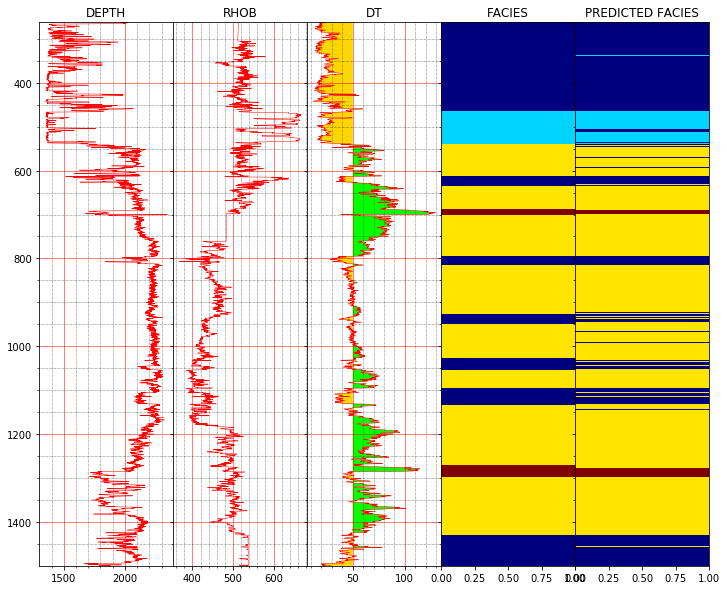

In [18]:
rows, cols = 1, 5
fig, ax = plt.subplots(nrows=rows,
                      ncols=cols,
                      figsize=(12,10),
                      sharey=True
                     )
titles = list(df.columns)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(dataValues[:,i+1], dataValues[:,0], 'r', linewidth='0.5')
        ax[i].set_ylim(max(dataValues[:,0]), min(dataValues[:,0]))
        ax[i].minorticks_on()
        ax[i].set_title('%s' %(titles[i]))
        ax[i].grid(which='major',
                  linestyle='-',
                  linewidth='0.5',
                  color='red'
                  )
        ax[i].grid(which='minor',
                  linestyle=':',
                  linewidth='0.5',
                  color='black'
                  )
    elif i == cols-2:
        F = np.vstack((dataValues[:,-1], dataValues[:,-1])).T
        m = ax[i].imshow(F, aspect='auto', cmap='jet', extent=[0, 1, max(dataValues[:,0]), min(dataValues[:,0])])
        ax[i].set_title('%s' %(titles[i+1]))
    elif i == cols-1:
        F = np.vstack((label_pred, label_pred)).T
        m = ax[i].imshow(F, aspect='auto', cmap='jet', extent=[0, 1, max(dataValues[:,0]), min(dataValues[:,0])])
        ax[i].set_title('PREDICTED FACIES')

y2 = dataValues[:,3]    
y1 = y2*0+50
ax[2].fill_betweenx(dataValues[:,0],
                    y1, 
                    y2, 
                    where=(y1>=y2), 
                    color='gold', 
                    linewidth=0
                   )
ax[2].fill_betweenx(dataValues[:,0],
                    y1, 
                    y2, 
                    where=(y1<y2), 
                    color='lime', 
                    linewidth=0
                   )
    
plt.subplots_adjust(wspace=0)
plt.show()